basic data vis

In [2]:
import numpy as np
import pandas as pd
import csv
import sklearn
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re
#from sentence_transformers import SentenceTransformer

data = pd.read_csv("tweets_num_crimes_per_month.csv", lineterminator="\n")

In [12]:
def keyword(text):
    temp = re.split("[^a-z]", text.lower())
    keywordList = set()
    words = ["lgbt", "lgbtqia", "gay", "lesbian",  "bisexual", 
     "queer", "transgender", "transphobia", "homophobia", "trans", 
     "homophobe", "transphobic", "homophobic", "transphobe", "asexual", 
     "aromantic", "cisgender", "homosexual", "pansexual"]
    
    for word in temp:
        if word in words:
            return word
    #return list(keywordList)

data["keyword"] = data["text"].apply(keyword)
data["keyword"] = data["keyword"].astype("category")
data = data.dropna()
data.head()
data = data.drop(columns=['text', 'place-full_name', 'user-description'])
data.head()

,Unnamed: 0,Unnamed: 0.1,Date,Unnamed: 1,create_at,geo_tag-cityName,geo_tag-stateName,id,lang,place-country,user-followers_count,user-id,Date.1,Year,sentiment,year-month,num_crimes_per_month,keyword
0,0,0,2015-11-24,0,2015-11-24T05:40:49.000Z,Greensboro,North Carolina,669027872309436416,en,United States,2222.0,3.085769e+08,2015-11-24,2015,Positive,2015-11,462.0,transgender
1,1,1,2015-11-24,1,2015-11-24T11:44:10.000Z,Pompano Beach,Florida,669119314109308929,en,United States,958.0,2.044995e+07,2015-11-24,2015,Positive,2015-11,462.0,gay
2,2,2,2015-11-24,2,2015-11-24T19:06:21.000Z,Norwalk,California,669230592253231104,en,United States,46.0,2.657305e+09,2015-11-24,2015,Positive,2015-11,462.0,gay
3,3,3,2015-11-24,3,2015-11-24T04:21:33.000Z,Granger,Indiana,669007925042507776,en,United States,165.0,9.179618e+08,2015-11-24,2015,Positive,2015-11,462.0,queer
4,4,4,2015-11-24,4,2015-11-24T17:19:54.000Z,Ocoee,Florida,669203801828671488,en,United States,2386.0,5.003118e+07,2015-11-24,2015,Negative,2015-11,462.0,gay


In [13]:
data.to_csv("tweets_num_crimes_per_month_with_keywords_no_text.csv")

<BarContainer object of 19 artists>

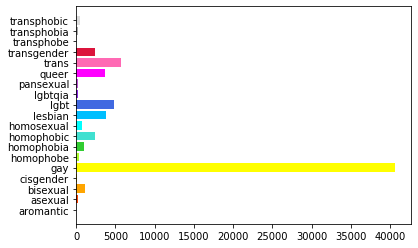

In [5]:
keywordData = data.groupby(["keyword"])["keyword"].count().reset_index (name="count")
plt.barh(keywordData["keyword"], keywordData["count"], color=["red", "orangered", "orange", "gold", "yellow", 
                                                              "greenyellow", "limegreen", "turquoise", "cyan", "deepskyblue", 
                                                              "royalblue", "blueviolet", "mediumorchid", "fuchsia", "hotpink", "crimson",
                                                              "dimgray", "darkgray", "gainsboro", "whitesmoke"])

([<matplotlib.axis.XTick at 0x2214c0de668>,
 <a list of 5 Text xticklabel objects>)

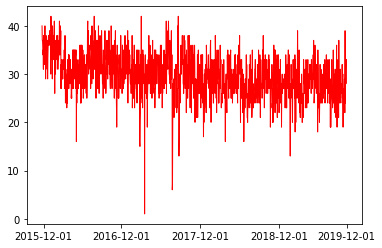

In [14]:
keywordDataDaily = data.groupby(["keyword", "Date"])["keyword"].count().reset_index (name="count")
keywordDataDaily

words = ["lgbt", "lgbtqia", "gay", "lesbian",  "bisexual", 
     "queer", "transgender", "transphobia", "homophobia", "trans", 
     "homophobe", "transphobic", "homophobic", "transphobe", "asexual", 
     "aromantic", "cisgender", "homosexual", "pansexual"]

colors=["red", "orangered", "orange", "gold", "yellow", 
     "greenyellow", "limegreen", "turquoise", "cyan", "deepskyblue", 
     "royalblue", "blueviolet", "mediumorchid", "fuchsia", "hotpink", "crimson",
     "dimgray", "darkgray", "gainsboro", "whitesmoke"]
    
temp = keywordDataDaily.loc[keywordDataDaily["keyword"] == "gay"]
plt.plot(temp["Date"], temp["count"], color="red", label=keyword, linewidth=1)
plt.xticks(["2015-12-01", "2016-12-01", "2017-12-01", "2018-12-01", 
            "2019-12-01"])